# Data Visualization World GNP In Numbers: 2013

In [604]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import math

In [347]:
Country=pd.read_csv("/Users/howardyan/Desktop/Country GDP Data.csv")

In [456]:
GNP=pd.read_csv("/Users/howardyan/Desktop/Continent.csv")
GNP.describe()

,AVG(GNP)
count,7.000000
mean,107349.571283
std,104131.430023
min,0.000000
25%,12499.209544
50%,107991.000000
75%,178301.395354
max,261854.789189


## First, I'll import a table "GDP" I created using an SQL Query to assess economic performance across continents

In [6]:
import seaborn as sns

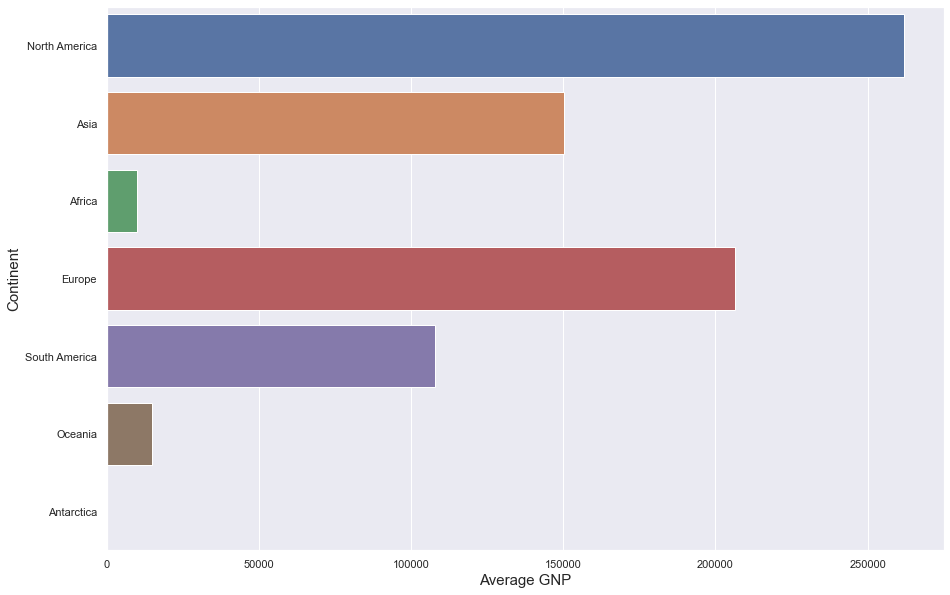

In [343]:
ax=sns.barplot(x='AVG(GNP)',y='Continent', data=GDP);
plt.xlabel('Average GNP', size=15);
plt.ylabel('Continent', size=15);


## I'm interested in Asia, so I'll select data for Asian countries

In [101]:
Asia=Country[Country['Region']=='Eastern Asia']
Asia.head(5)

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
41,CHN,China,Asia,Eastern Asia,9572900.0,-1523.0,1.277558e+09,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN
92,HKG,Hong Kong,Asia,Eastern Asia,1075.0,NaN,6.782000e+06,79.5,166448.0,173610.0,Xianggang/Hong Kong,Special Administrative Region of China,Jiang Zemin,937.0,HK
109,JPN,Japan,Asia,Eastern Asia,377829.0,-660.0,1.267140e+08,80.7,3787042.0,4192638.0,Nihon/Nippon,Constitutional Monarchy,Akihito,1532.0,JP
116,KOR,South Korea,Asia,Eastern Asia,99434.0,1948.0,4.684400e+07,74.4,320749.0,442544.0,Taehan Min’guk (Namhan),Republic,Kim Dae-jung,2331.0,KR
129,MAC,Macao,Asia,Eastern Asia,18.0,NaN,4.730000e+05,81.6,5749.0,5940.0,Macau/Aomen,Special Administrative Region of China,Jiang Zemin,2454.0,MO


In [102]:
Asia=Asia[['Name','GNP','Population']].dropna()

In [570]:
Asia['GNP Per Capita in US$']=round(Asia['GNP']*10**6/Asia['Population'],1)

In [573]:
Asia['GNP Per Capita in US$']=Asia['GNP Per Capita in US$'].replace([768.9],7689);

In [574]:
Asia

,Name,GNP,Population,GNP Per Capita in US$
41,China,982268.0,1.277558e+09,7689.0
92,Hong Kong,166448.0,6.782000e+06,24542.6
109,Japan,3787042.0,1.267140e+08,29886.5
116,South Korea,320749.0,4.684400e+07,6847.2
129,Macao,5749.0,4.730000e+05,12154.3
141,Mongolia,1043.0,2.662000e+06,391.8
173,North Korea,5332.0,2.403900e+07,221.8
217,Taiwan,256254.0,2.225600e+07,11513.9


In [575]:
import matplotlib.pyplot as plt

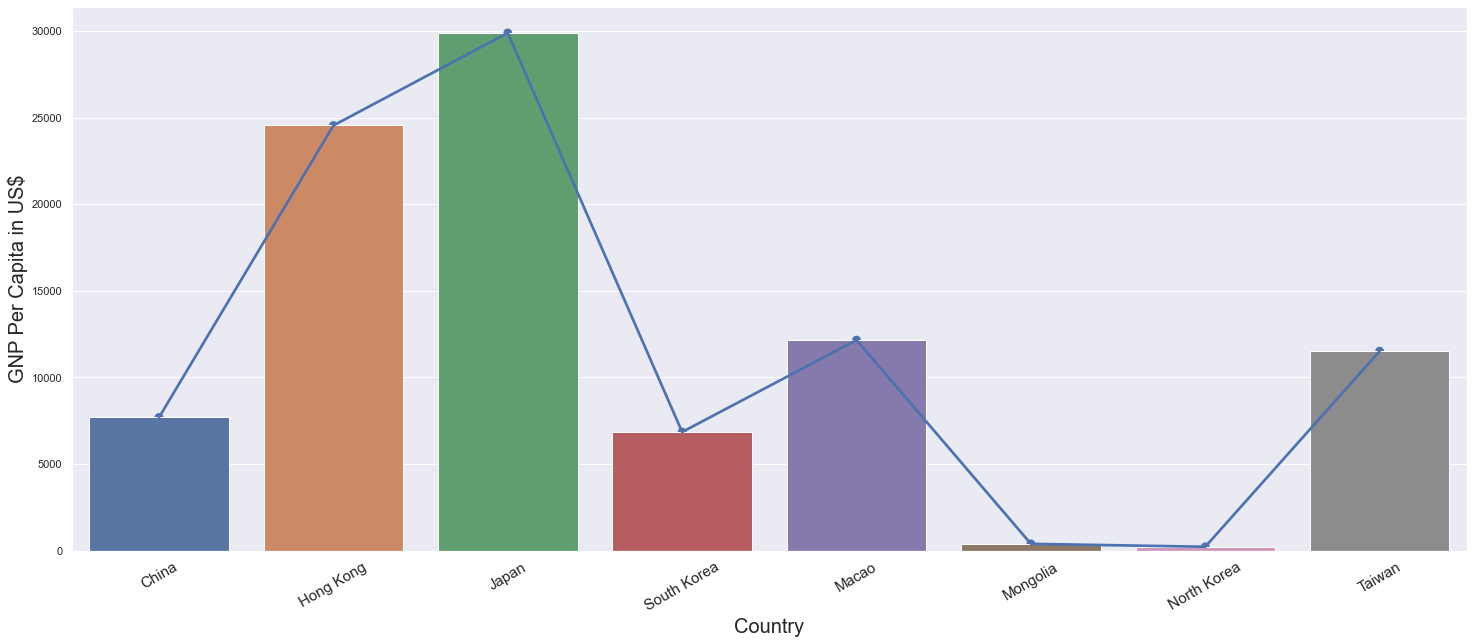

In [576]:
sns.barplot(data=Asia,x='Name',y='GNP Per Capita in US$');
ax = sns.pointplot(x="Name",y="GNP Per Capita in US$", data=Asia)
ax.set_xticklabels(Asia['Name'], rotation=30, size=15);
ax.set(xlabel='Country', ylabel='GNP Per Capita in US$');
sns.set(rc={'figure.figsize':(15,10)});
plt.xlabel('Country', size=20);
plt.ylabel('GNP Per Capita in US$', size=20);

We see a significant different in GNP across each country. That said, South Korea's GNP Per Capita seems unusually low, given it a developed country.

## Now I'd like to review data in each region

In [577]:
Regions=Country.groupby(['Region']).sum()
Regions['Regions']=np.array(Regions.index)
Regions.head(15)

,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,Capital,Regions
Region,,,,,,,,
Antarctica,13132101.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,Antarctica
Australia and New Zealand,8011939.0,3808.0,2.275310e+07,157.6,405851.0,457871.0,10548.0,Australia and New Zealand
Baltic Countries,175117.0,5973.0,7.561900e+06,207.0,22418.0,18595.0,8672.0,Baltic Countries
British Islands,313173.0,2987.0,6.339850e+07,154.5,1454251.0,1369962.0,1903.0,British Islands
Caribbean,234423.0,25287.0,3.814000e+07,1753.4,103586.2,93205.0,37724.0,Caribbean
Central Africa,6612667.0,17678.0,9.565200e+07,452.8,32938.0,29257.0,18726.0,Central Africa
Central America,2479532.0,14853.0,1.352210e+08,568.2,473151.0,456254.0,11400.0,Central America
Eastern Africa,6299891.0,30502.0,2.469990e+08,965.4,69925.0,73118.0,45806.0,Eastern Africa
Eastern Asia,11774482.0,5579.0,1.507328e+09,602.0,5524885.0,5996835.0,17422.0,Eastern Asia


In [578]:
Regions['Log GNP']=np.log(Regions['GNP']).dropna()
Regions=Regions[Regions['Regions']!='Antarctica']
Regions=Regions[Regions['Regions']!='Micronesia/Caribbean']
Regions[['Regions']]=Regions[['Regions']].replace({'Australia and New Zealand':'Oceania'});
Regions.head(15)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,Capital,Regions,Log GNP
Region,,,,,,,,,
Australia and New Zealand,8011939.0,3808.0,2.275310e+07,157.6,405851.0,457871.0,10548.0,Oceania,12.913741
Baltic Countries,175117.0,5973.0,7.561900e+06,207.0,22418.0,18595.0,8672.0,Baltic Countries,10.017619
British Islands,313173.0,2987.0,6.339850e+07,154.5,1454251.0,1369962.0,1903.0,British Islands,14.190002
Caribbean,234423.0,25287.0,3.814000e+07,1753.4,103586.2,93205.0,37724.0,Caribbean,11.548159
Central Africa,6612667.0,17678.0,9.565200e+07,452.8,32938.0,29257.0,18726.0,Central Africa,10.402382
Central America,2479532.0,14853.0,1.352210e+08,568.2,473151.0,456254.0,11400.0,Central America,13.067170
Eastern Africa,6299891.0,30502.0,2.469990e+08,965.4,69925.0,73118.0,45806.0,Eastern Africa,11.155179
Eastern Asia,11774482.0,5579.0,1.507328e+09,602.0,5524885.0,5996835.0,17422.0,Eastern Asia,15.524773
Eastern Europe,18814094.0,19572.0,3.070260e+08,699.3,659980.0,792589.0,29732.0,Eastern Europe,13.399965


I'll use the Log of GNP so the graph appears more uniform. It is easy to see that Western Europe has a higher GNP than Oceania.

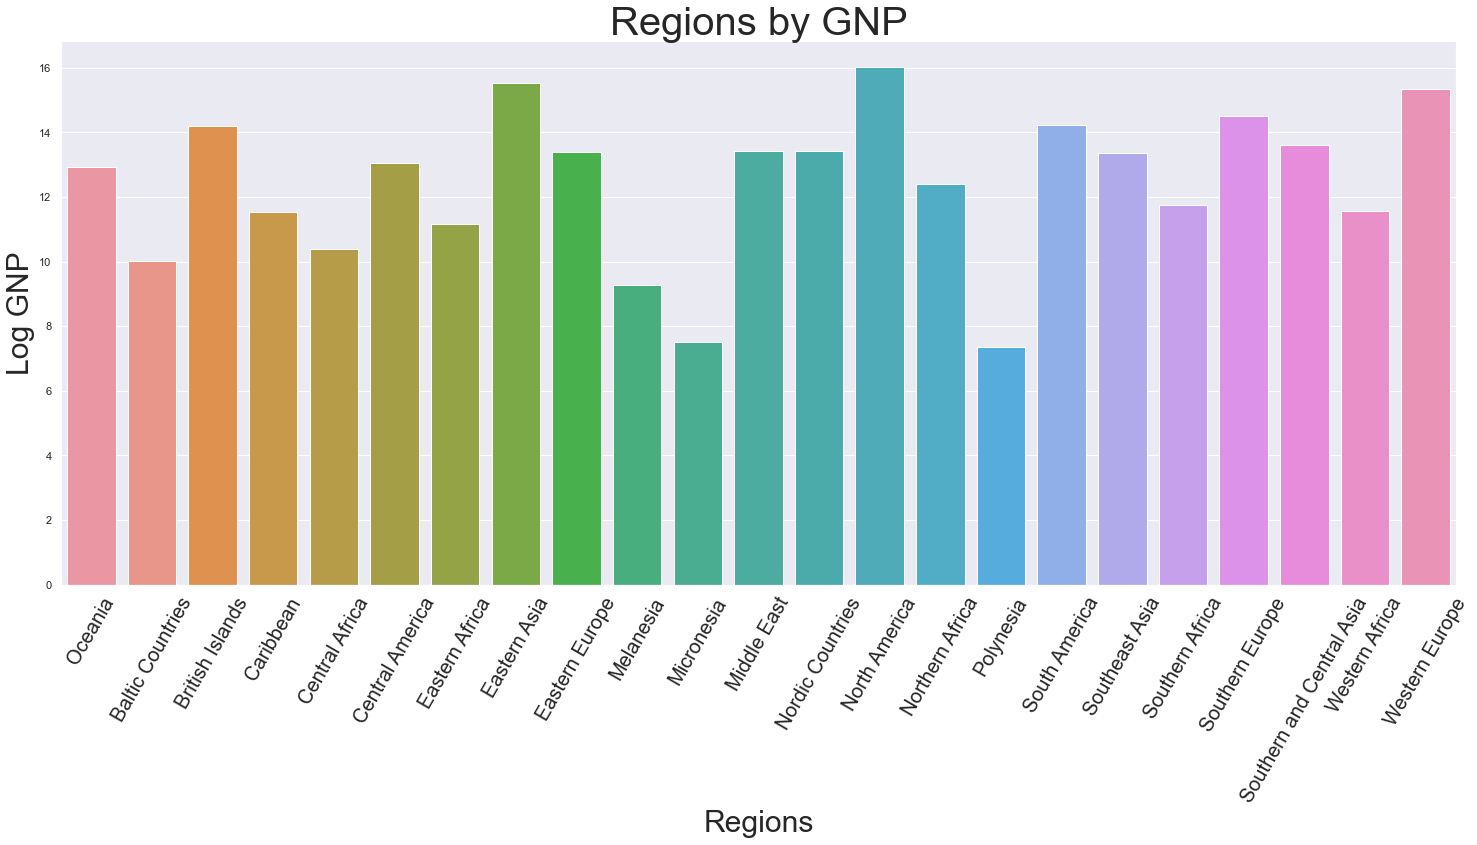

In [579]:
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x='Regions',y='Log GNP',data=Regions);
ax = sns.barplot(x="Regions",y="Log GNP", data=Regions)
ax.set_xticklabels(Regions['Regions'], rotation=60, size=20);
plt.xlabel("Regions", size=30)
plt.ylabel("Log GNP", size=30);
plt.title('Regions by GNP',size=40);

## Now, I'd like to compare the distribution of GDP Per Capita in East Asia vs Western Europe

In [583]:
Asia

,Name,GNP,Population,GNP Per Capita in US$
41,China,982268.0,1.277558e+09,7689.0
92,Hong Kong,166448.0,6.782000e+06,24542.6
109,Japan,3787042.0,1.267140e+08,29886.5
116,South Korea,320749.0,4.684400e+07,6847.2
129,Macao,5749.0,4.730000e+05,12154.3
141,Mongolia,1043.0,2.662000e+06,391.8
173,North Korea,5332.0,2.403900e+07,221.8
217,Taiwan,256254.0,2.225600e+07,11513.9


In [580]:
W_Europe=Country[Country['Region']=='Western Europe'].dropna()
W_Europe
W_Europe['GNP Per Capita in US$']=W_Europe['GNP']/W_Europe['Population']*10**6
W_Europe=W_Europe[['Name','GNP','Population','GNP Per Capita in US$']]
W_Europe

,Name,GNP,Population,GNP Per Capita in US$
15,Austria,211860.0,8091800.0,26182.060852
18,Belgium,249704.0,10239000.0,24387.537845
39,Switzerland,264478.0,7160400.0,36936.204681
56,Germany,2133367.0,82164700.0,25964.520043
72,France,1424285.0,59225700.0,24048.428301
123,Liechtenstein,1119.0,32300.0,34643.962848
127,Luxembourg,16321.0,435700.0,37459.260959
158,Netherlands,371362.0,15864000.0,23409.102370


<ipython-input-607-5c3db8ef8614>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(round(W_Europe['GNP Per Capita in US$'],1),size=20);


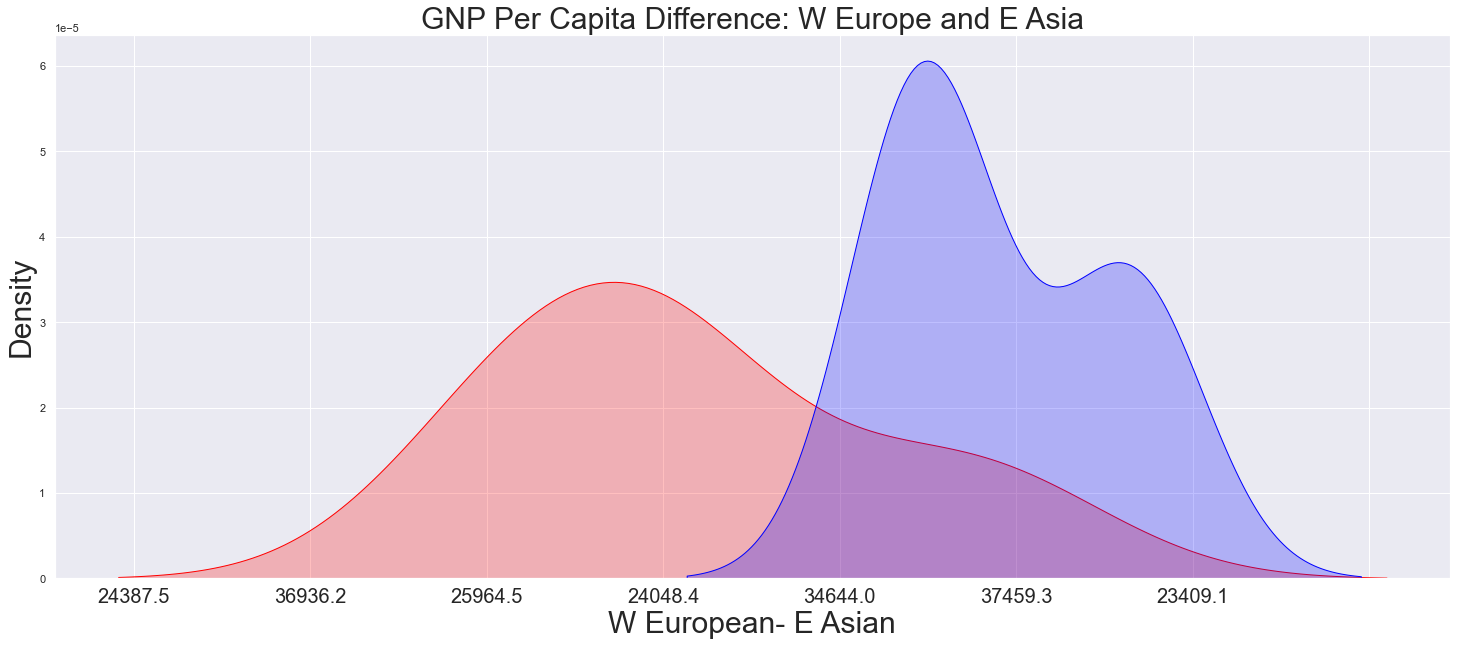

In [607]:
sns.kdeplot(Asia['GNP Per Capita in US$'],color='red', label='Asia', shade=True);
ax=sns.kdeplot(W_Europe['GNP Per Capita in US$'],color='blue', label='Europe',shade=True);
ax.set_xticklabels(round(W_Europe['GNP Per Capita in US$'],1),size=20);
plt.title('GNP Per Capita Difference: W Europe and E Asia',size=30);
plt.ylabel('Density', size=30);
plt.xlabel('W European- E Asian', size=30);

## I'd like to analyze the difference between Western European and East Asian GNP Per Capita and by means of a bootstrap

In [591]:
EURO_GNP=W_Europe['GNP Per Capita in US$']

In [592]:
ASIA_GNP=Asia['GNP Per Capita in US$']

In [593]:
def boot(sample1,sample2):
    resample=np.random.choice(sample1,len(sample1))-np.random.choice(sample2,len(sample2))
    m=np.mean(resample)
    return m

In [587]:
boot(EURO_GNP,ASIA_GNP)

15122.713054112584

In [594]:
carrier=np.arange(10000)

In [595]:
for i in np.arange(10000):
    carrier[i]=boot(EURO_GNP,ASIA_GNP)

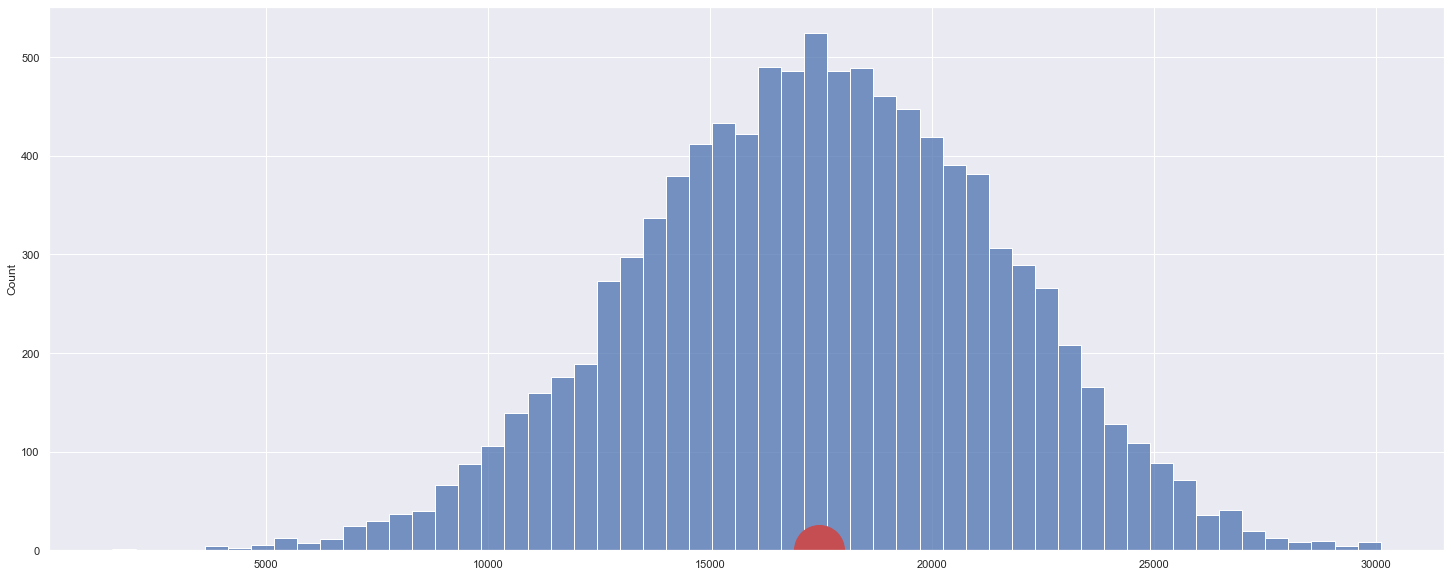

In [602]:
sns.histplot(carrier);
plt.plot(np.mean(carrier),0,'ro',markersize=50);

In [597]:
np.mean(carrier)

17451.0217

In [598]:
## The average difference is around $17451

## I want to see percentage of world GNP by region

In [550]:
GNP_Region=pd.read_csv("/Users/howardyan/Desktop/GDP BY REGION.csv")
GNP_Region

,Region,SUM(GNP)
0,Caribbean,103586.2
1,Southern and Central Asia,810604.0
2,Central Africa,32938.0
3,Southern Europe,2012289.0
4,Middle East,677260.0
5,South America,1511874.0
6,Polynesia,1545.0
7,Antarctica,0.0
8,Australia and New Zealand,405851.0
9,Western Europe,4673272.0


In [551]:
GNP_Region['Percentage']=GNP_Region['SUM(GNP)']/sum(GNP_Region['SUM(GNP)'])*100

In [552]:
GNP_Region

,Region,SUM(GNP),Percentage
0,Caribbean,103586.2,0.352875
1,Southern and Central Asia,810604.0,2.761392
2,Central Africa,32938.0,0.112206
3,Southern Europe,2012289.0,6.855034
4,Middle East,677260.0,2.307144
5,South America,1511874.0,5.150328
6,Polynesia,1545.0,0.005263
7,Antarctica,0.0,0.000000
8,Australia and New Zealand,405851.0,1.382566
9,Western Europe,4673272.0,15.919900


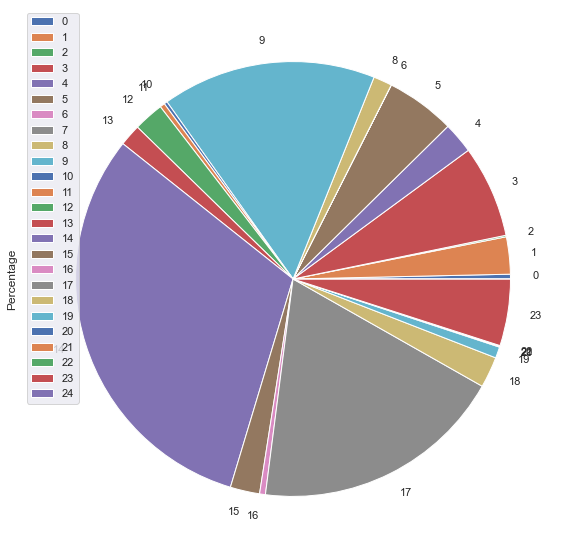

In [553]:
GNP_Region.plot.pie(x='Region',y='Percentage');